In [54]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()



# Generate data with 20% of poplation having Covid, 80% healthy
random_st = 1234
data_size = 100000

x, y = make_classification(n_samples=data_size, weights=[0.2, 0.8], flip_y=0, random_state=random_st)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_st)

sgd_clf = SGDClassifier(loss='log', random_state=random_st)
sgd_clf.fit(x_train, y_train)

#forest_clf = RandomForestClassifier(n_estimators=10, random_state=random_st)

cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)



array([[12526,  3400],
       [ 2905, 61169]])

In [55]:

print( "Precision: ", precision_score(y_train, y_train_pred) )

print( "Recall: ", recall_score(y_train, y_train_pred) )

print( "F1 score: ", f1_score(y_train, y_train_pred) )



Precision:  0.9473431522867011
Recall:  0.9546617972968755
F1 score:  0.9509883942383186


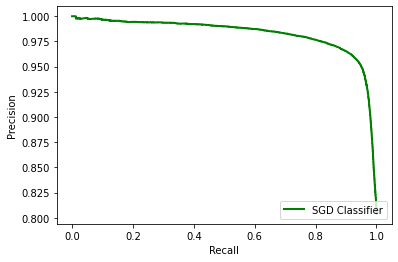

In [64]:

y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3,
method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

#plt.plot(precisions, recalls, linewidth=2, label='SGD Classifier', color="green")
plt.plot(recalls, precisions, linewidth=2, label='SGD Classifier', color="green")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.show()



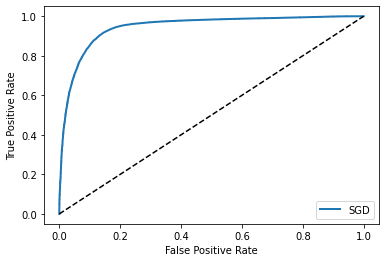

In [57]:
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

#plt.plot(fr_forest, tpr_forest, "b:", label="Forrest")
plot_roc_curve(fpr, tpr, "SGD")
plt.legend(loc="lower right")
plt.show()

In [58]:
roc_auc_score(y_train, y_scores)

0.9438977437204489

In [59]:
confusion_matrix(y_train, y_scores)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [60]:
x, y = make_classification(n_samples=data_size, weights=[0.2, 0.8], flip_y=0, random_state=random_st)

(y==1).sum()

80000

In [62]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.7865126208715308

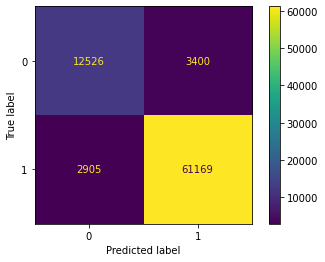

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

mat = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(mat).plot()